<a href="https://colab.research.google.com/github/msantoshidevi/Health-Insurance-Cross-Sell-Prediction-Project/blob/branch-1/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. In this project, we have an insurance details dataset which contains a total of 381109 rows and 12 columns. We have a categorical dependent variable Response which represents whether a customer is interested in vehicle insurance or not. This is our target variable. As an initial step, we checked for the null and duplicate values in our dataset. As there were no null and duplicate values present in our dataset, so data cleaning was not required. Further, we remove outliers.

In Exploratory Data Analysis, we categorized the Age as YoungAge, MiddleAge, OldAge.Then we categorized Region_Code to extract some valuable information from these features. We explored the independent features using some plots.

For Feature selection, we normalized the numerical columns for bringing them on the same scale. We used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique.

For Model prediction, we used supervised machine learning algorithms like Decision tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes and Logistic regression. Then applied hyperparameter tuning techniques to obtain better accuracy and to avoid overfitting.

# **GitHub Link -**

https://github.com/msantoshidevi/Health-Insurance-Cross-Sell-Prediction-Project/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb

# **Problem Statement**


An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [198]:
# Import Libraries
# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Hypothesis Testing
from scipy import stats

# ML Models
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Load Dataset
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Final ML Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [74]:
# Dataset First Look
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


OBSERVATION

* Dataset consists of 6 numeric and 5 categorical independent features.
* Our dependent feature is a categorical column (Response)

### Dataset Rows & Columns count

In [75]:
# Dataset Rows & Columns count
data_df.shape

(381109, 12)

OBSERVATION

* Dataset has 381109 rows and 12 columns, which means 381109 observations and 12 variables.

### Dataset Information

In [76]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [77]:
# Dataset Duplicate Value Count
data_df[data_df.duplicated()].shape

(0, 12)

There are no duplicates in this dataset.

#### Missing Values/Null Values

In [78]:
# Missing Values/Null Values Count
data_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values present in the dataset.

### What did you know about your dataset?

The dataset is about Health Insurance customers, and we have to analyze the Health Insurance customers and the insights behind it.

Cross selling is a strategy of offering consumers to buy additional products they have already purchased. Therefore, Cross selling productions are often considered as recommendations that buyers cannot refuse.

In this case, Cross selling is also done to attract health insurance users to also participate in the vehicle insurance program created by the health insurance company.

The above dataset has 381109 rows and 12 columns. From 12 columns, there are 11 independent features and 1 dependent feature. Dataset contains of 6 numeric and 5 categorical independent features. Our dependent feature is a categorical column (Response). There are no mising values and duplicate values in the dataset.



## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [80]:
# Dataset Describe
data_df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description

* **ID:** Unique identifier for the Customer.

* **Age:** Age of the Customer.

* **Gender:** Gender of the Customer.

* **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

* **Region_Code:** Unique code for the region of the customer.

* **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

* **Vehicle_Age:** Age of the vehicle.

* **Vehicle_Damage:**  0 for Customer didn't get his/her vehicle damaged in the past, 1 for Customer got his/her vehicle damaged in the past.

* **Annual_Premium:** The amount customer needs to pay as premium in the year.

* **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage:** Number of Days, Customer has been associated with the company.

* **Response (Dependent Feature):** 0 for Customer is not interested, 1 for Customer is interested.

### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
for i in data_df.columns.tolist():
  print(f"No. of unique values in {i} is {data_df[i].nunique()}")

No. of unique values in id is 381109
No. of unique values in Gender is 2
No. of unique values in Age is 66
No. of unique values in Driving_License is 2
No. of unique values in Region_Code is 53
No. of unique values in Previously_Insured is 2
No. of unique values in Vehicle_Age is 3
No. of unique values in Vehicle_Damage is 2
No. of unique values in Annual_Premium is 48838
No. of unique values in Policy_Sales_Channel is 155
No. of unique values in Vintage is 290
No. of unique values in Response is 2


In [82]:
data_df['id'].unique()

array([     1,      2,      3, ..., 381107, 381108, 381109])

* 'Id' column is a continuous variable. It starts from 1 to 381109. We can drop this column while performing EDA.

In [83]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

* 'Gender' column is a categorical variable. It contain of 2 values - Male and Female.

In [84]:
data_df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

* 'Age' column is a continuous variable. Customer age varies from 20 to 85.

In [85]:
data_df['Driving_License'].unique()

array([1, 0])

* 'Driving_License' column is a categorical variable. It contain of 2 values - 1 and 0.

In [86]:
data_df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

* 'Region_Code' is a continuous variable. It's varies from 0 to 57.

In [87]:
data_df['Previously_Insured'].unique()

array([0, 1])

* 'Previously_Insured' column is a categorical variable. It contain of 2 values - 1 and 0.

In [88]:
data_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

* 'Vehicle_Age' column is a categorical variable. It contain of 3 values - > 2 Years , 1-2 Year and < 1 Year.

In [89]:
data_df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

* 'Vehicle_Damage' column is a categorical variable. It contain of 2 values 'Yes' and 'No'.

In [90]:
data_df['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

* 'Annual_Premium' is a continuous variable.

In [91]:
data_df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

* 'Policy_Sales_Channel' is a continuous variable.

In [92]:
data_df['Vintage'].unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

* 'Vintage' is a continuous variable.

In [93]:
data_df['Response'].unique()

array([1, 0])

* 'Response' is categorical variable. It's contain 2 values - 0 and 1.

## 3. ***Data Wrangling***

### Copying Dataset

In [169]:
data_df2 = data_df.copy(deep=True)

### Data Wrangling Code

### Finding Outliers

In [170]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

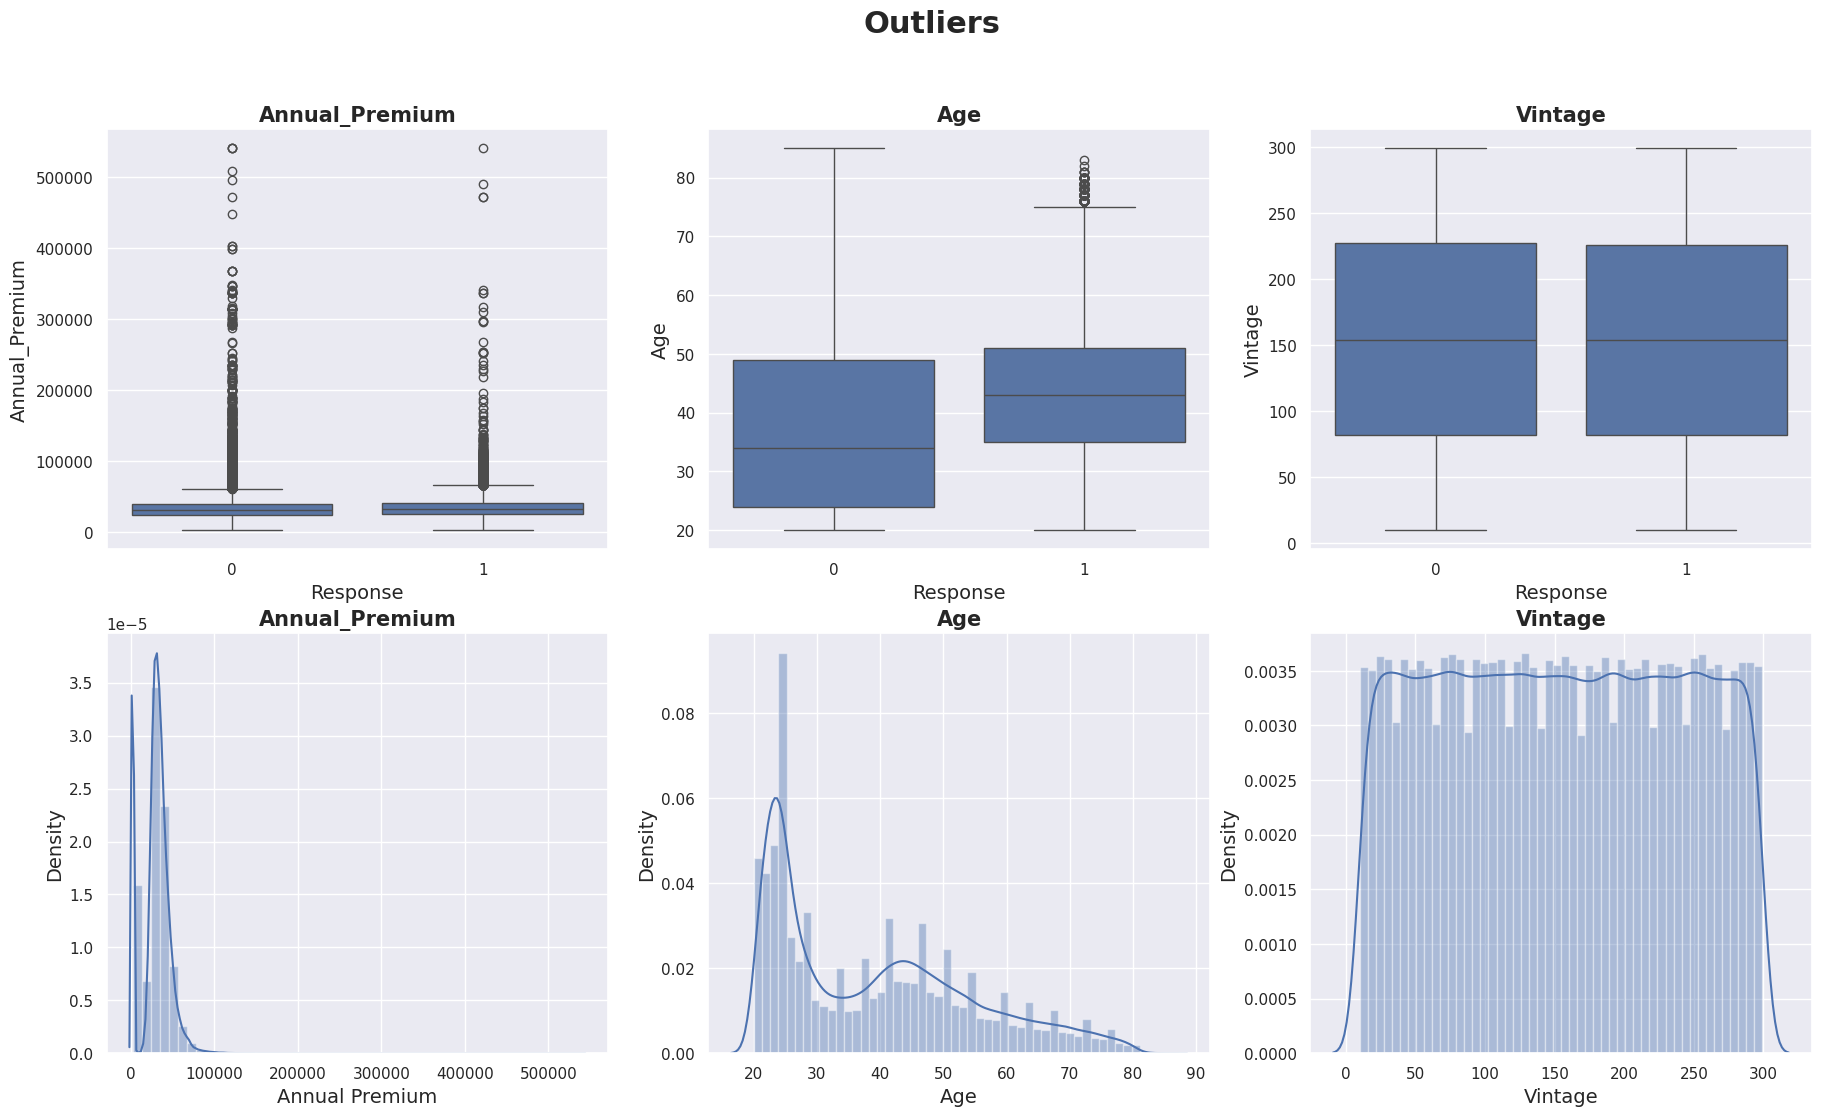

In [171]:
show_outliers(data_df2)

* From the above plot, it can be implied that Annual Premium has a positively skewed distribution.
* From above, we can also observe that Vintage has a approximately uniform distribution.
* Age columns has some outliers but we are not going to treat them because it won't be affecting our result.
* Annual Premium column has outliers which we have to treat.

### Outliers Treatment

In [172]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

In [173]:
outlier_treatment(data_df2)

* For Outlier treatment, we have applied quantile method.
* Here we added new column 'Annual_Premium_Treated' to dataset where outliers get replaced by Upper_whisker value.

In [174]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

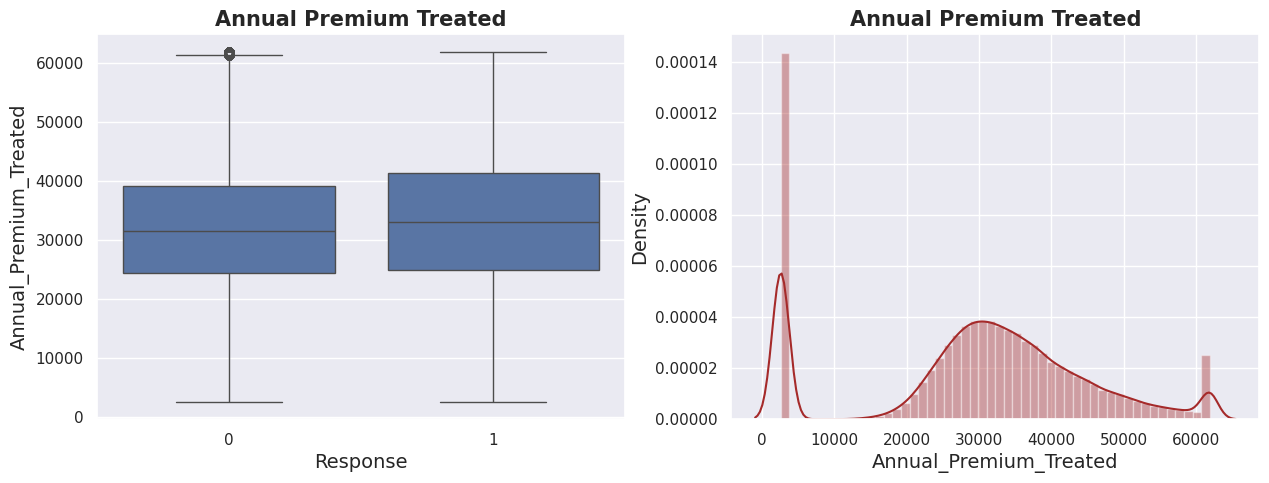

In [175]:
show_ann_prem_outliers(data_df2)

* From the above plots we can see that there are no more outliers in Annual Premium.

### Creating new columns for visulization

In [176]:
def creating_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Region_Code feature
    df['Region_Code_Categorical'] = df['Region_Code'].apply(lambda x: 'Region_A' if x <= 17 else 'Region_B' if x>17 and x<=34 else 'Region_C')

In [177]:
creating_numerical_to_categorical(data_df2)

In [178]:
data_df2.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Age_Group,Region_Code_Categorical
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40454.0,YoungAge,Region_B
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,33536.0,OldAge,Region_A
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,38294.0,MiddleAge,Region_B
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,28619.0,YoungAge,Region_A
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,27496.0,YoungAge,Region_C


* Here, we created 2 categorical column for visulization analysis - Age Groups column and Region code categorical column.

### Dropping Unwanted Columns

In [179]:
data_df3 = data_df2.drop(columns = ['Annual_Premium'])

In [180]:
data_df3.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Age_Group,Region_Code_Categorical
0,1,Male,44,1,28.0,0,> 2 Years,Yes,26.0,217,1,40454.0,YoungAge,Region_B
1,2,Male,76,1,3.0,0,1-2 Year,No,26.0,183,0,33536.0,OldAge,Region_A
2,3,Male,47,1,28.0,0,> 2 Years,Yes,26.0,27,1,38294.0,MiddleAge,Region_B
3,4,Male,21,1,11.0,1,< 1 Year,No,152.0,203,0,28619.0,YoungAge,Region_A
4,5,Female,29,1,41.0,1,< 1 Year,No,152.0,39,0,27496.0,YoungAge,Region_C



* As we created a new column 'Annual_Premium_Treated' while treating outliers. So, we dropped the 'Annual_Premium' column.

### What all manipulations have you done and insights you found?

We detected the outliers, treated those outliers, dropped unwanted columns, and added new columns for further visualization analysis.

While outlier detection the insights that we got from the graph are Annual Premium and Age column has a positively skewed distribution. Vintage has an approximately Uniform distribution. We found some outliers in the Age column but we do not treat them as it would not be affecting our result. We found outliers in the Annual Premium Column which we had treated.

For outliers treatment, we have applied the quantile method where we replaced outliers with the upper whisker of Annual Premium as the outliers lie on the upper side of the boxplot. After the outlier treatment, there are no more outliers in the Annual Premium.

We created new columns Age Group and Region Code categorical columns for visualization analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of target variable

<Axes: xlabel='Response', ylabel='count'>

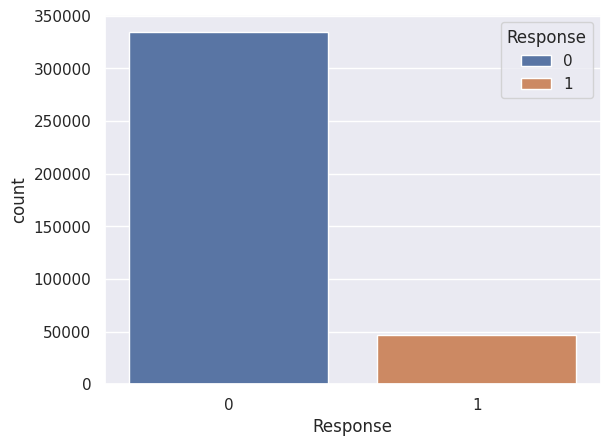

In [106]:
# Chart - 1 visualization code
sns.set_theme(style="darkgrid")
sns.countplot(x = data_df3['Response'], data = data_df3 , hue = "Response")

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing count of Target variable (Response). As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using count plot, we can analyze wheater it is balanced or imbalanced dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* The data is highly imbalanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, gained insight lead to negative growth as dataset is highly imbalanced. The problem with training the model with an imbalanced dataset is that the model will be biased towards the majority class only. This causes a problem when we are interested in the prediction of the minority class. Here Customer is not interested in Vehicle Insurance is important over customer is intereseted in Vehicle Insurance.

#### Chart - 2 Response in male and female category

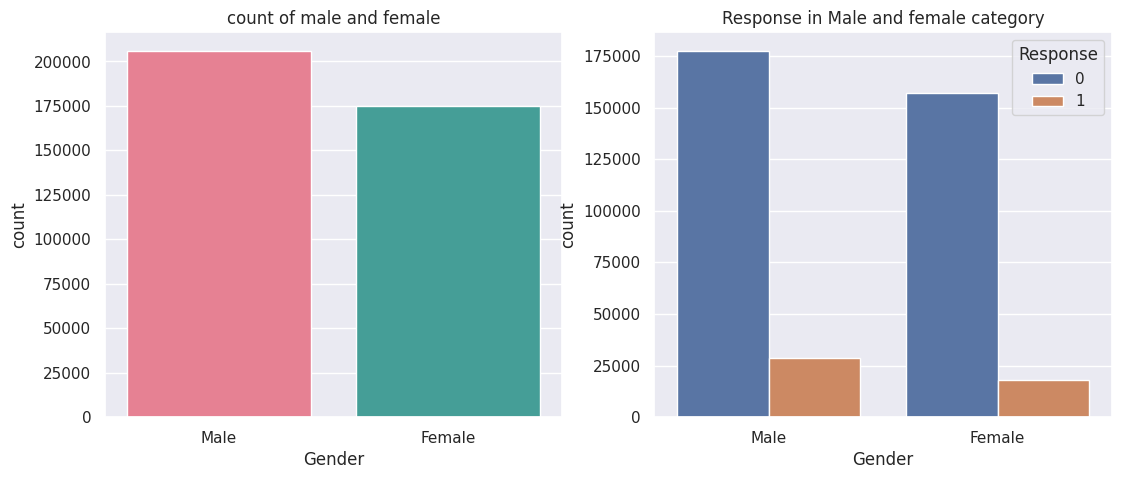

In [107]:
# Chart - 2 visualization code
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x = data_df3['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x = data_df3['Gender'],data = data_df3, hue = 'Response')
plt.title("Response in Male and female category")
plt.show()

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing count of Male and Female Customers. As Count plot show the counts of observations in each categorical bins using bars.As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the distribution of gender variable and compare the Response in Male and Female category.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* The gender variable in the dataset is almost equally distributed.
* Male category is slightly greater than that of female and chances of buying the insurance is also little high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insight help in creating a positive business impact as Male category is slightly greater than female category. So, Male customer chances of buying the insurance is little higher compare to Female customer.

#### Chart - 3 Response of different age groups

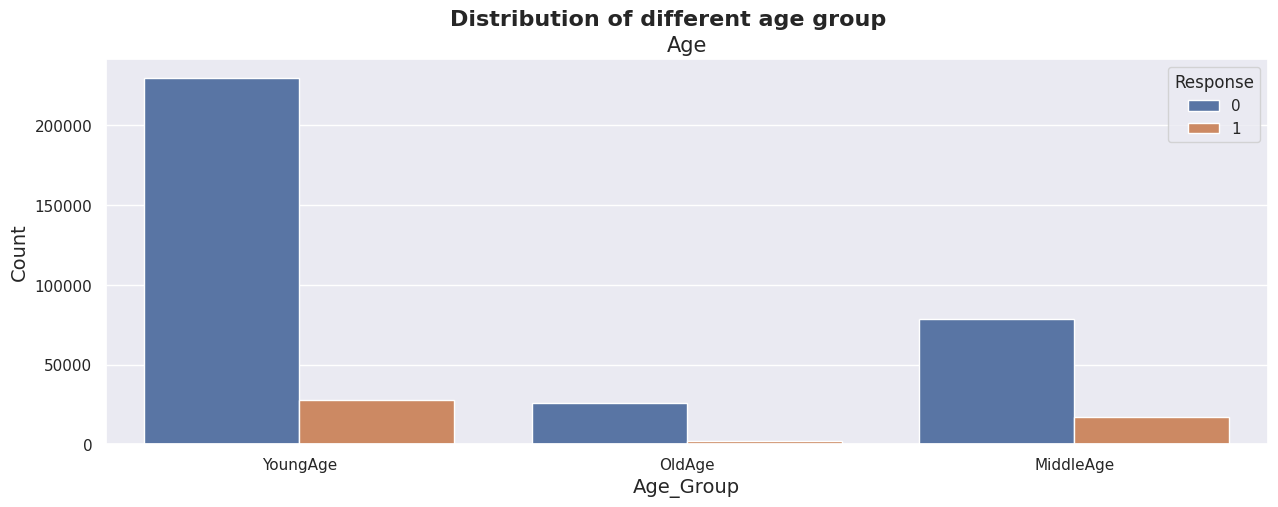

In [108]:
# Chart - 3 visualization code
def show_distribution_of_age(df):
    fig, axes = plt.subplots(1,1, figsize=(15,5))

    sns.countplot(ax = axes,x = 'Age_Group', data = df, hue='Response')
    axes.set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes.set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes.set_title('Age', fontdict={'fontsize': 15})

    plt.suptitle('Distribution of different age group', fontsize = 16, fontweight = 'bold' )

show_distribution_of_age(data_df3)

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing Age groups Response. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the distribution of Age group variable and compare the Response in Young age, Old age and Middle age.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Customers belonging to YoungAge group are interested in taking insurance but not as high as Middle age people. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* Old age group customers only a few of them were interested in taking the vehicle insurance.
* Middle age group customers are interested in taking the highest number of insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, gained insights lead to negative growth as customer belonging to Young age group are more likely not interested in taking the vehicle insurance. Even though most of the drivers belong to young age group when compared to other groups.

One positive impact is Middle age group are more interested in taking the insurance.


#### Chart - 4 Response from different regions

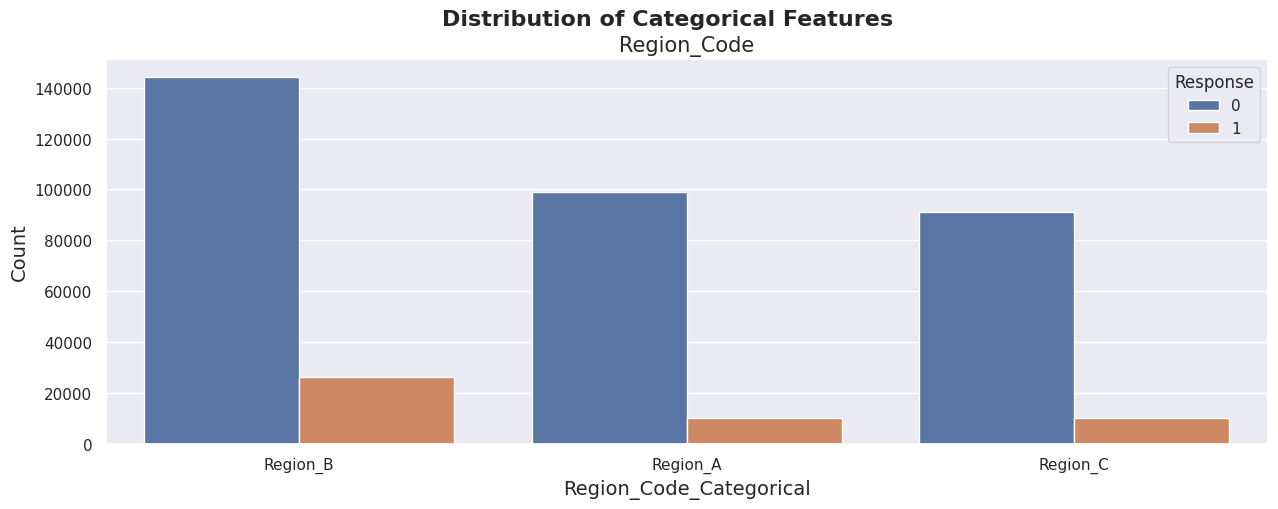

In [109]:
# Chart - 4 visualization code
def show_distribution_of_region_code(df):
    fig, axes = plt.subplots(1,1, figsize=(15,5))

    sns.countplot(ax = axes,x = 'Region_Code_Categorical', data = df, hue='Response')
    axes.set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes.set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes.set_title('Region_Code',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 16, fontweight = 'bold' )

show_distribution_of_region_code(data_df3)

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing Response from different Regions. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the distribution of Region variable and compare the Response from Region A, Region B and Region C.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

*  Region_B Customers has the highest chances of not taking the vehicle insurance.
* Region_A and Region_C customers have similar chances of taking and not taking the vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gained insights will help in creating a positive business impact as we now know that Region B customers are most likely not interested in taking vehicle policy. So we can focus on other region customers and we can conduct events for increasing Region B customer chance of taking vehicle insurance.

#### Chart - 5 Response for customers having Driving License and not

<Axes: xlabel='Driving_License', ylabel='count'>

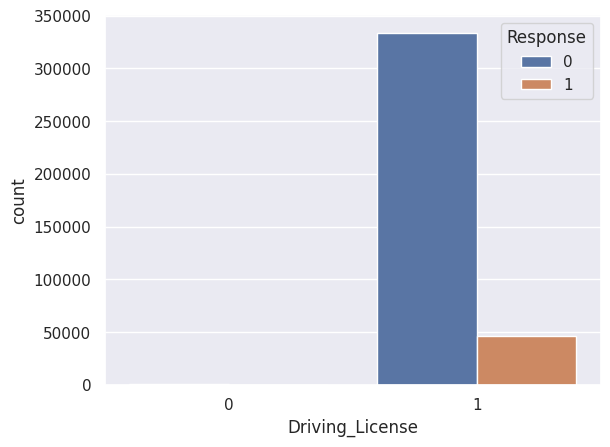

In [110]:
# Chart - 5 visualization code
sns.countplot(x = data_df3['Driving_License'],hue=data_df3['Response'])

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing Response of Customers with Driving License and customers without Driving License. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the distribution of Driving License variable and compare the Response from customer having Driving License and customer not having Driving License.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Customers who are interested in Vehicle Insurance almost all have driving license.
* Every customer have Vehicle Insurance in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gained insights help creating a positive business impact as Most of customers having driving license are interested in taking vehicle insurance.

#### Chart - 6 Response of Previously Insured customers

<Axes: xlabel='Previously_Insured', ylabel='count'>

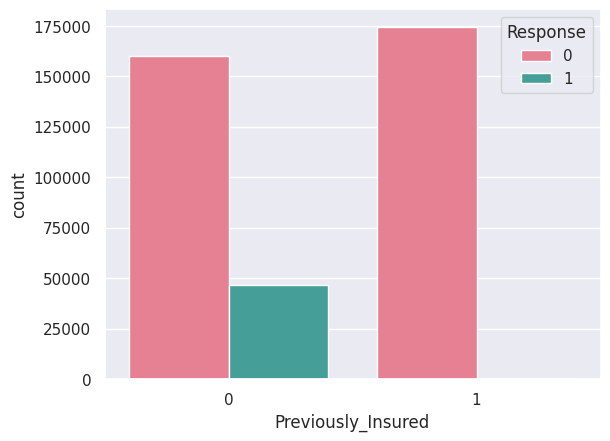

In [111]:
# Chart - 6 visualization code
sns.countplot(x='Previously_Insured',hue='Response',data=data_df3,palette='husl')

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing Response of Customers who previously insured and customers who not previously insured. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the distribution of Driving Previously Insured variable and compare the Response from customer who previously insured and customer who not previously insured.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Customer who are not perviously insured are likely to be interested.
* Customer who are perviously insured are not interested in taking Vehicle Insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights help in creating a positive business impact as customer who are previously insured are not interested in taking Vehicle Insurance. So we can target the customer who are not taken Vehicle Insurance previously.

#### Chart - 7 Exploring the age feature

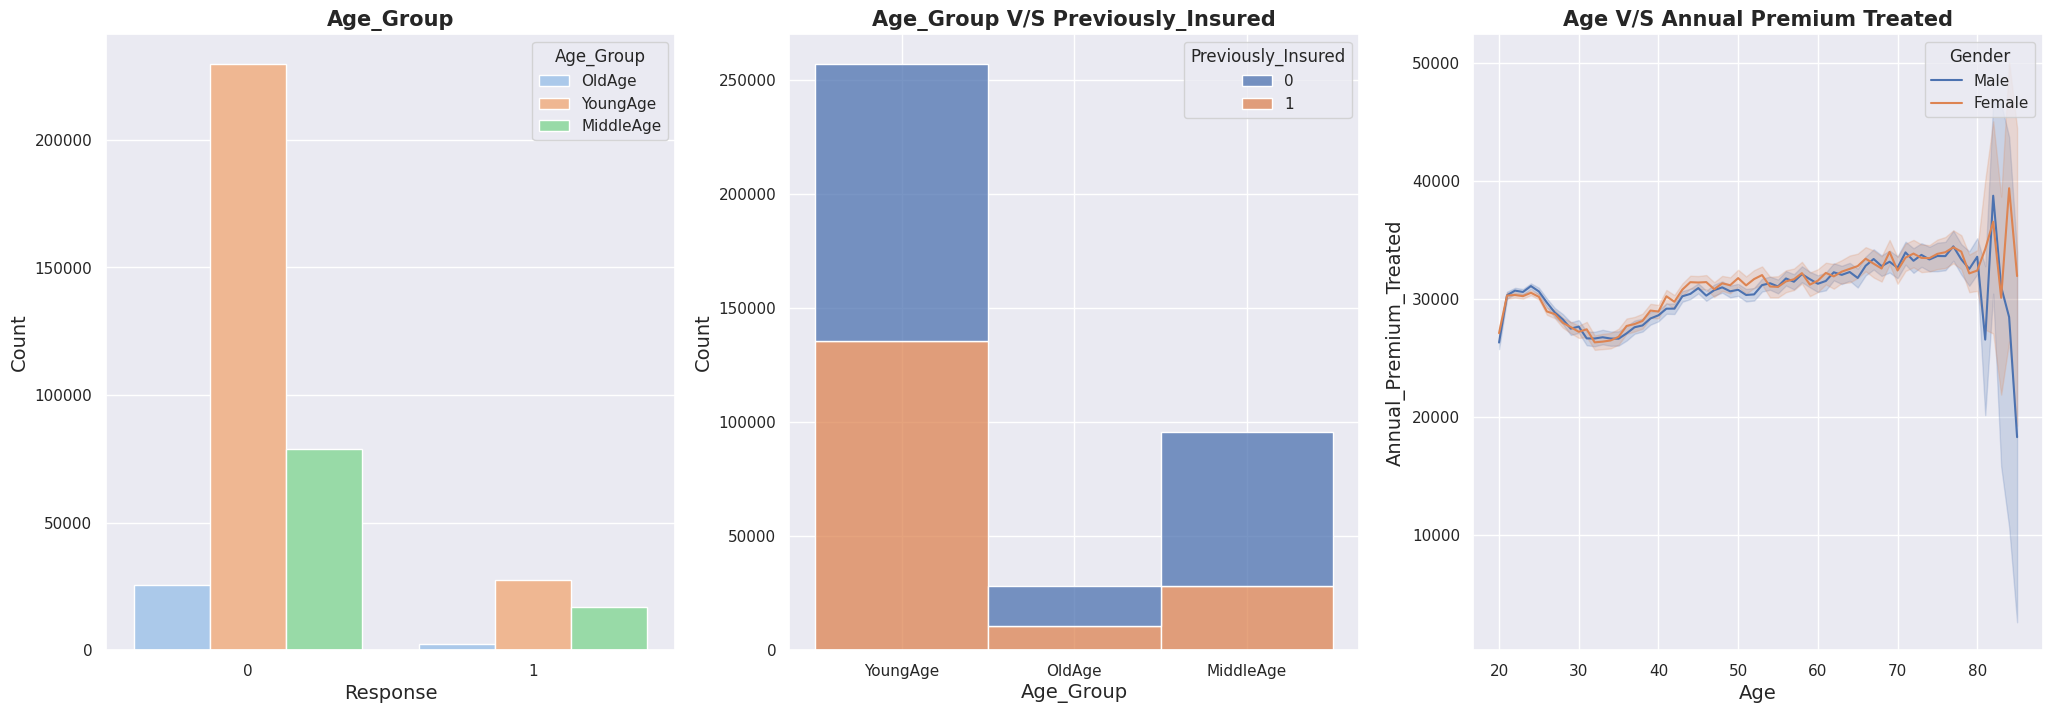

In [112]:
# Chart - 7 visualization code
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group",
                 hue="Previously_Insured", data=df,
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

show_age_relations(data_df3)


##### 1. Why did you pick the specific chart?

We used 3 plots for exploring age feature. They are count plot, histogram plot and line plot.

We choose Count plot for comparing Response of different age groups. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the responses received from the different age groups and compare the Response of young age group customer, middle age group customer and old age group customer.

We choose histogram plot for analyzing distribution of different age groups customers. As a histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.

By using histogram plot, we analyze the number of customers of different age group having or not having vehicle Insurance.

We choose line plot to find relationship between Age feature and Annual_Premium_Treated. As a line plot, also called a dot plot, is a graph that shows the frequency, or the number of times, a value occurs in a data set. This dot plot contains a random dataset. Line plots are constructed with each value recorded along the horizontal axis, also called the x-axis.

By using line plot, we analyze the relation between age and their annual prmium for both Male and Female customers.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* From the first plot, we can see the Responses received from the different Age_Group.
* Customers belonging to Young age group have more likely to not interested in taking Vehicle insurance.
* Second plot shows the number of customers of different age group having or not having vehicle insurance.
* We can say that the customers of YoungAge and OldAge are equally likely to have/not have vehicle insurance whereas customers of MiddleAge has the highest chances of not having a previously insured vehicle insurance.
* From the third plot, we can see the relation between Age and their Annual_Premium for both Male and Female customers.
* Male and Female age and Annual Premium are similarly various. Age between around 22 to 40 customer have little lower Annual premium compare to other age customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights help in creating a positive business impact as YoungAge and OldAge are equally likely to have/not have vehicle insurance whereas customers of MiddleAge has the highest chances of not having a previously insured vehicle insurance. So we focuse on middle age group customer as they has the highest chances of not previously insured. Not Previously insured are interested in taking Vehicle Insurance.

#### Chart - 8  Vehicle_Age Vs Response

<Axes: xlabel='Vehicle_Age', ylabel='count'>

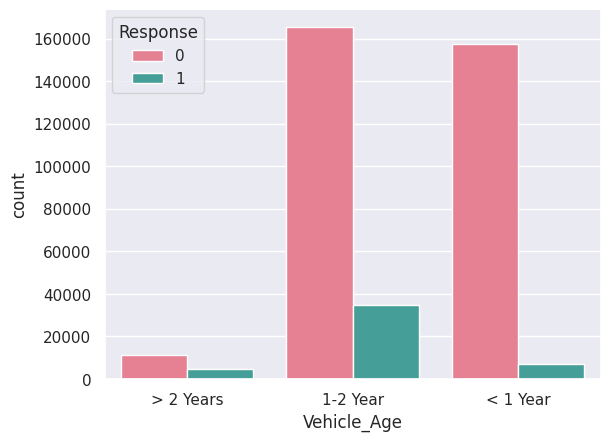

In [113]:
# Chart - 8 visualization code
sns.countplot(x='Vehicle_Age',hue='Response',data=data_df3,palette='husl')

##### 1. Why did you pick the specific chart?

We choose Count plot for comparing Response of Vechicle age. As Count plot show the counts of observations in each categorical bins using bars. As Count plot show the counts of observations in each categorical bins using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so we can compare counts across nested variables.

By using Count plot, we analyze the Vehicle age by comparing response of customer having vehicle greater than 2 years, between 1 to 2 year and less than 1 year .

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two.
* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we gained insights help in creating a positive business impact as Customers with vechicle age 1-2 years are more likely to interested as compared to the other two. So the customers having vehicle age 1 to 2 Years have the higher chances of taking vehicle insurance.

#### Chart - 9 Distribution of Vintage

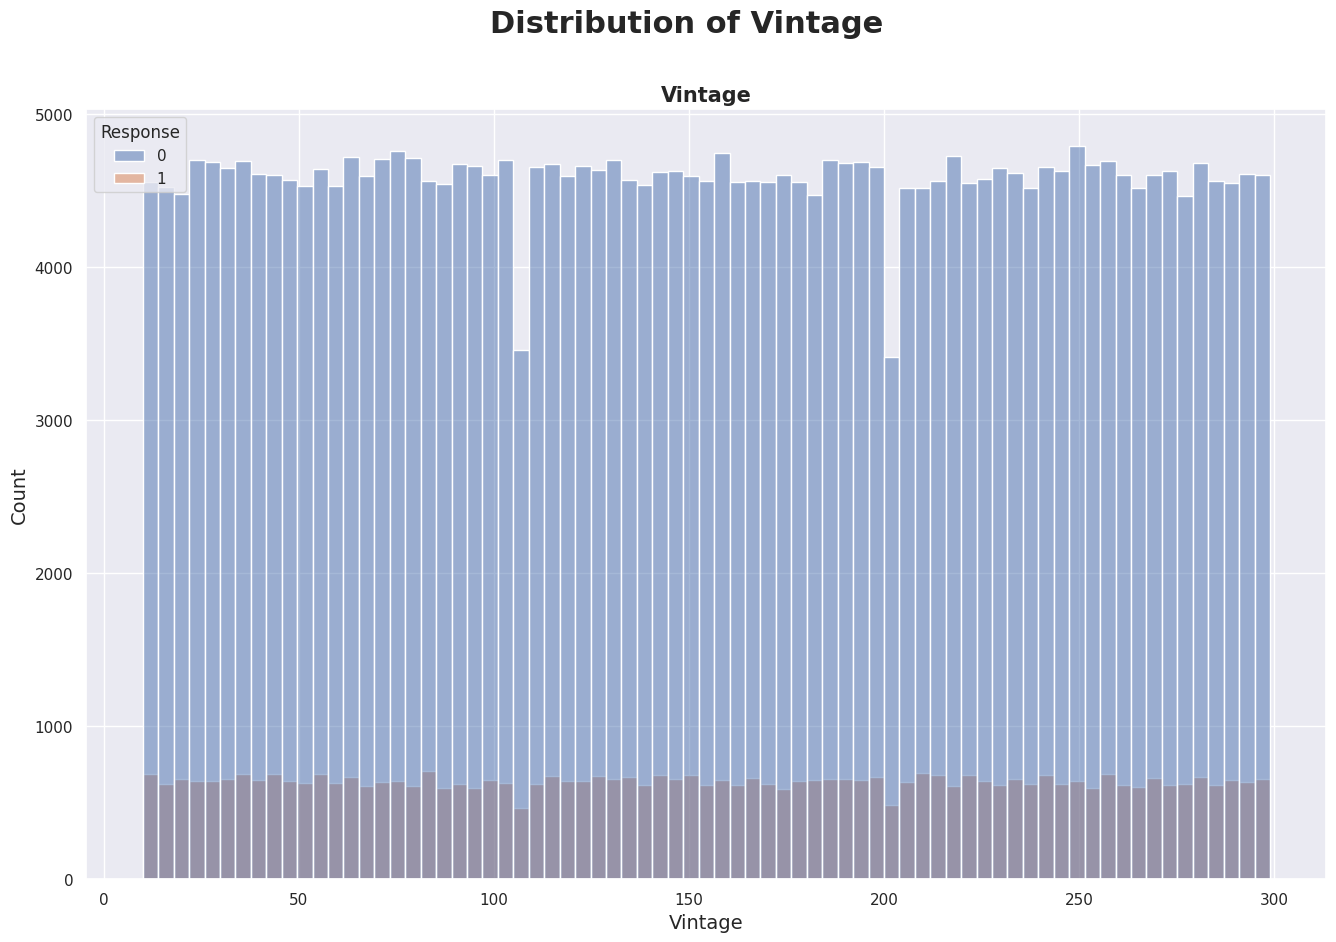

In [114]:
# Chart - 10 visualization code
def show_distribution_of_Vintage(df):
    fig, axes = plt.subplots(1,1, figsize=(16,10))

    sns.histplot(ax = axes, x = data_df['Vintage'],data = df, hue='Response')
    axes.set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes.set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes.set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Vintage', fontsize = 22, fontweight = 'bold' )

show_distribution_of_Vintage(data_df3)

##### 1. Why did you pick the specific chart?

A histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).So we choose histogram graph which shows distribution of Vintage.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Vintage has a approximately uniform distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, gained insights not help creating a positive business impact as it does not effecting any business positively or negatively.

#### Chart - 10 Response of Vehicle Damage

In [115]:
# Chart - 11 visualization code
x = data_df3.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

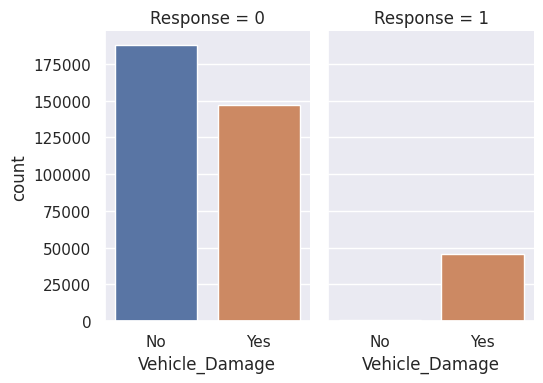

In [116]:
sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=x, kind="bar",
                height=4, aspect=.7, hue= "Vehicle_Damage");

##### 1. Why did you pick the specific chart?

We choose categorical plot for showing response of Customers vehicle got damaged and not got damaged. As categorical plot is basically used for visualizing the relationship between variables. Those variables can be either be completely numerical or a category like a group, class or division.

##### 2. What is/are the insight(s) found from the chart?

The insights found from chart are:

* Customers whose vehicle got damaged are more interested in taking insurance compared to those whose vehicle did not get damaged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insight helps in creating a positive business impact as customers whose vechile got damaged are more interested in taking insurance. So, we can focus those customer whose vehicle got damage for the growth of business.  

#### Chart - 11 - Correlation Heatmap

Text(0.5, 1.05, 'Pearson correlation of Features')

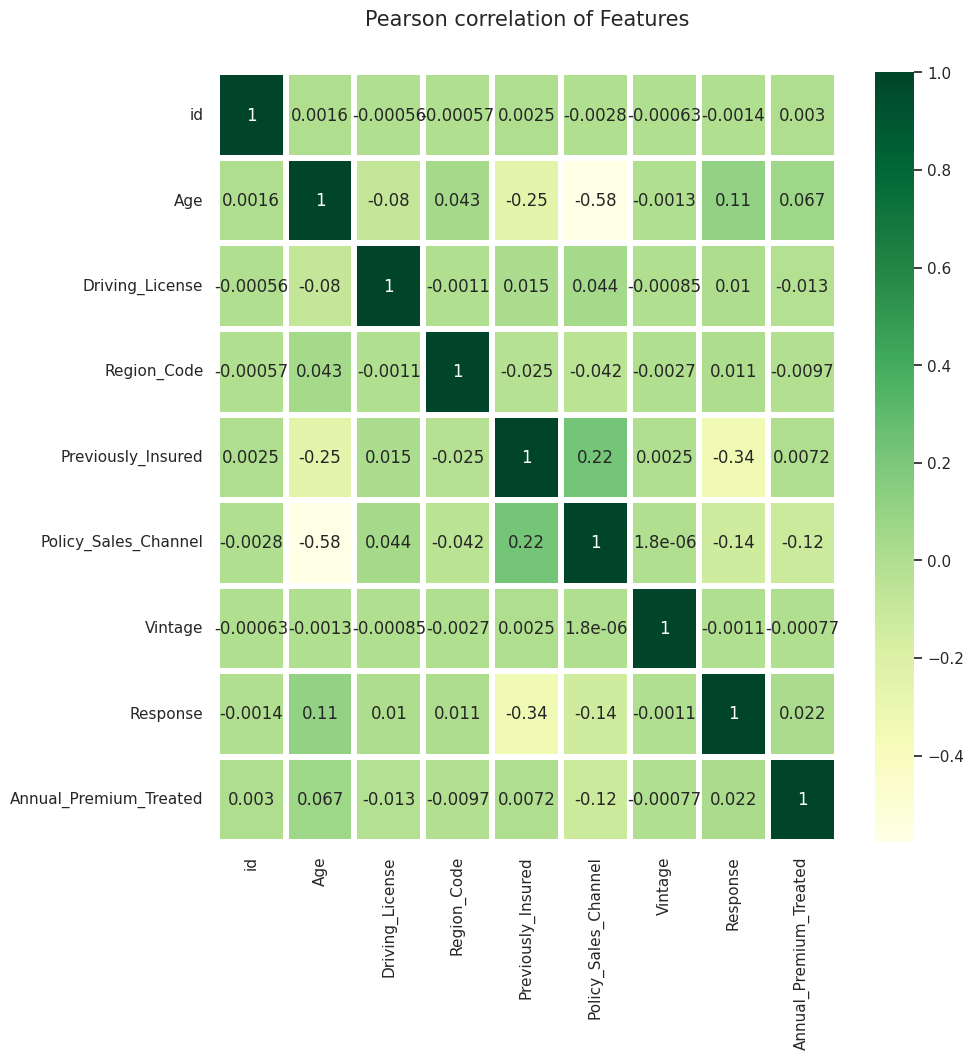

In [117]:
# Correlation Heatmap visualization code
corr = data_df3.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)


##### 1. Why did you pick the specific chart?

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. So we choose coorelation heatmap to displays the correlation between multiple variables as a color-coded matrix.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

* Target variable is not much affected by Vintage variable. we can drop least correlated variable.

#### Chart - 12 - Pair Plot

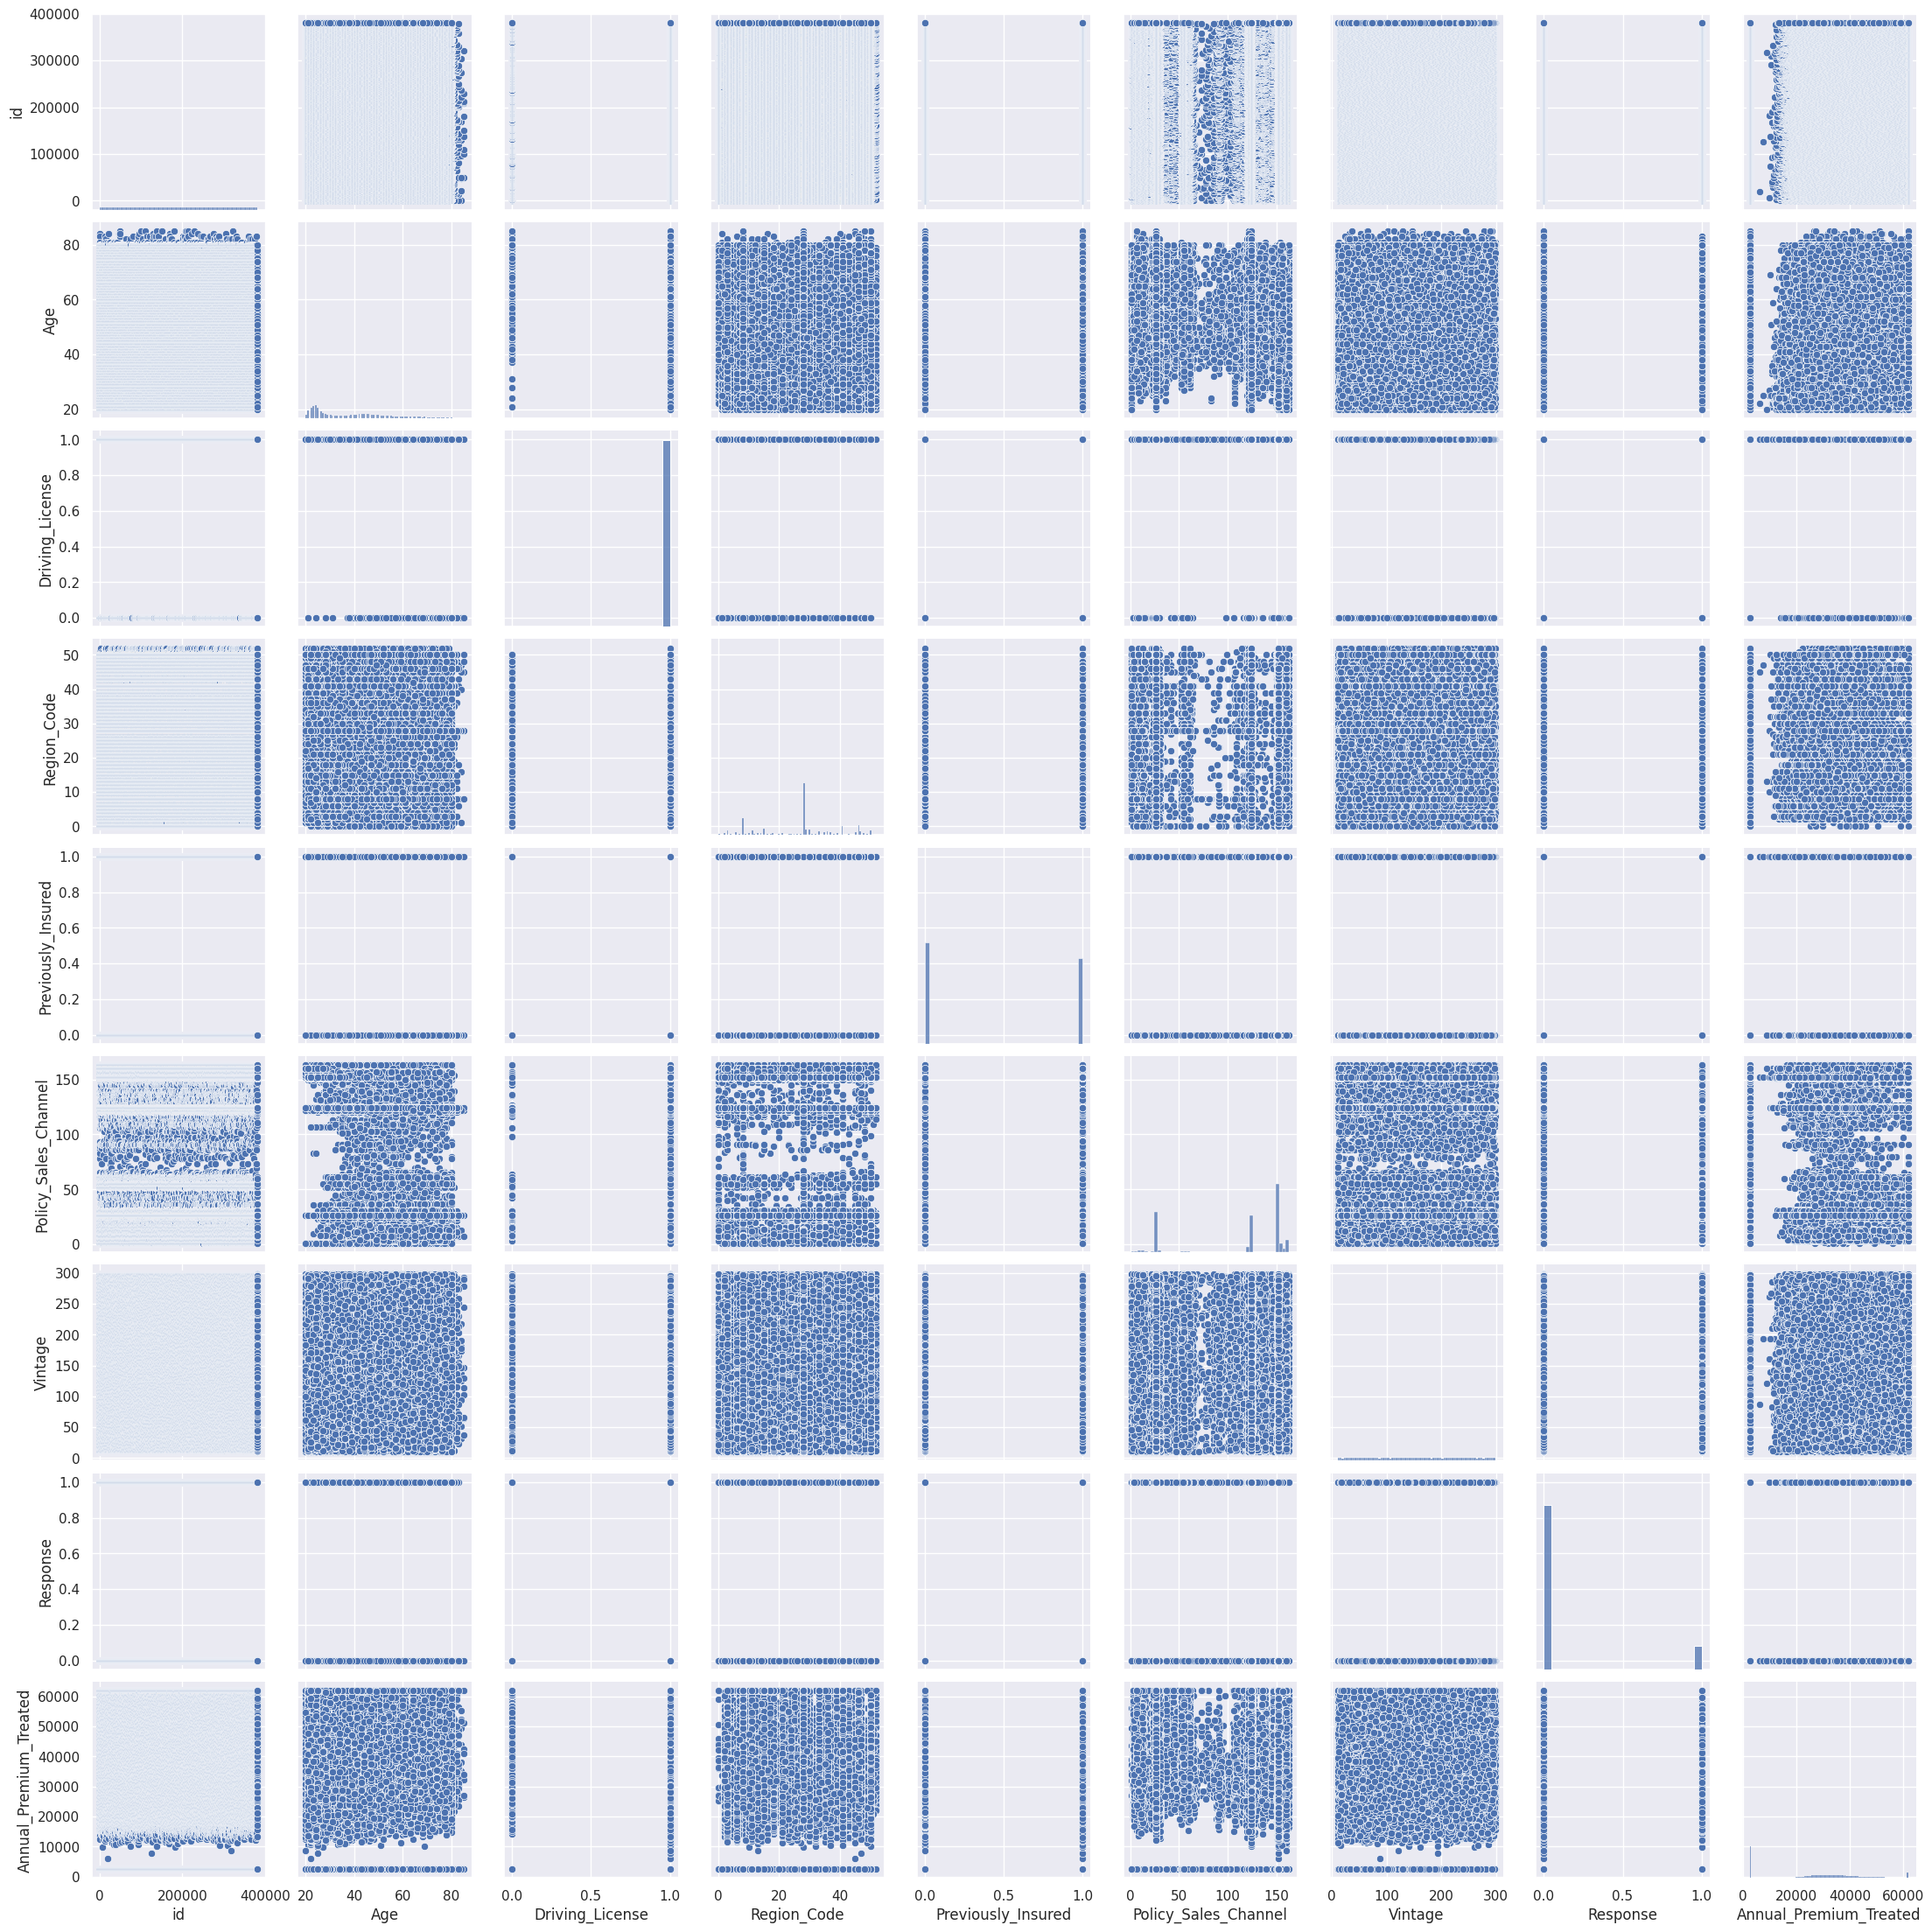

In [118]:
# Pair Plot visualization code
sns.pairplot(data_df3)

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all variables in a dataset to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Based on the pairplot analysis, it appears that the variables in the dataset have a week or no significant linear relationship with each other. There are no clear patterns or strong correlations between the variables. This suggests that the variables are relatively independent of each other and may not have a strong influence on one another.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Male customers are more interested to buy vehicle insurance than female customers.
2. More than 25% customers are interested to buy vehicle insurance.
3. If the Customer got his/her vehicle damaged in the past, they would be more interested in buying vehicle insurance.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - "Male customers and Female customers are equally interested to buy vehicle insurance"

**Alternate Hypothesis** - "Male customers are more interested to buy vehicle insurance than female customers"

#### 2. Perform an appropriate statistical test.

In [125]:
# Perform Statistical Test to obtain P-Value
# 2 groups are created
male_response = data_df3[data_df3.Gender == 'Male'].Response
female_response = data_df3[data_df3.Gender == 'Female'].Response

# Define the null hypothesis
H0 = "Male customers and Female customers are equally interested to buy vehicle insurance"

# Define the alternative hypothesis
H1 = "Male customers are more interested to buy vehicle insurance than female customers"

# Calculate the test statistic
result = stats.ttest_ind(male_response, female_response, alternative='greater', equal_var=False)

# Print the results
print("Test statistic:", result.statistic)
print("P-value:", result.pvalue)

# Conclusion
if result.pvalue < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

Test statistic: 32.74483018945294
P-value: 3.827709205021008e-235
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Welch’s independent 2 sample t-test

##### Why did you choose the specific statistical test?

As Male and Female are two independent groups of which we want to measure their average values. Welch's t-test is specifically done because it does not assume that the variances of both group are same.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** - "25% customers are interested to buy vechicle insurance."

**Alternate Hypothesis** - "More than 25% customers are interested to buy vehicle insurance."

#### 2. Perform an appropriate statistical test.

In [129]:
# Perform Statistical Test to obtain P-Value

# Define the null hypothesis
H0 = "25% customers are interested to buy vechicle insurance"

# Define the alternative hypothesis
H1 = "More than 25% customers are interested to buy vehicle insurance"

# Calculate the test statistic
statistic,pvalue = stats.ttest_1samp(data_df['Response'],0.25, alternative='greater')

# Print the results
print("Test statistic:", statistic)
print("P-value:", pvalue)

# Conclusion
if pvalue < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

Test statistic: -239.89993335714271
P-value: 1.0
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One sample t-test

##### Why did you choose the specific statistical test?

As this is a test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - "Customers whose vehicle got damaged  and customers whose vehicle not got damaged both are equally interested to buy Vehicle insurance."

Alternate Hypothesis - "If the Customer got his/her vehicle damaged in the past, they would be more interested in buying vehicle insurance."

#### 2. Perform an appropriate statistical test.

In [138]:
# Perform Statistical Test to obtain P-Value
# 2 groups are created
damaged_response = data_df3[data_df3.Vehicle_Damage == "Yes"].Response
not_damaged_response = data_df3[data_df3.Vehicle_Damage == "No"].Response

# Define the null hypothesis
H0 =  "Customers whose vehicle got damaged and customers whose vehicle not got damaged both are equally interested to buy Vehicle insurance."

# Define the alternative hypothesis
H1 = "If the Customer got his/her vehicle damaged in the past, they would be more interested in buying vehicle insurance."

# Calculate the test statistic
result = stats.ttest_ind(damaged_response, not_damaged_response, alternative='greater', equal_var=False)

# Print the results
print("Test statistic:", result.statistic)
print("P-value:", result.pvalue)

# Conclusion
if result.pvalue < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")


Test statistic: 236.1357844573827
P-value: 0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Welch’s independent 2 sample t-test

##### Why did you choose the specific statistical test?

As Customers whose vehicle got damaged and Customers whose vechicle not got damaged are two independent groups of which we want to measure their average values. Welch's t-test is specifically done because it does not assume that the variances of both group are same.

## ***6. Feature Engineering & Data Pre-processing***

### Copying dataset

In [192]:
df = data_df3.copy(deep=True)

### Dropping unwanted columns

In [203]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium',
       'Age_Group', 'Region_Code_Categorical'],
      dtype='object')

In [205]:
# Dropping Unnecessary Columns
cols_to_drop = ['id', 'Age_Group',
                'Region_Code_Categorical']
df.drop(columns = cols_to_drop, inplace = True)

* As we have added some columns 'Age_group'and 'Region_Code_categorical' features in our data set so we can now drop these features.
* We can also drop 'ID' as they are not providing any valuable information.

### 1. Handling Missing Values

In [206]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Annual_Premium          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset.

### 2. Handling Outliers

In [207]:
# Rename the Annual_Premium_Treated column to Annual_Premium
df = df.rename(columns = {'Annual_Premium_Treated':'Annual_Premium'})

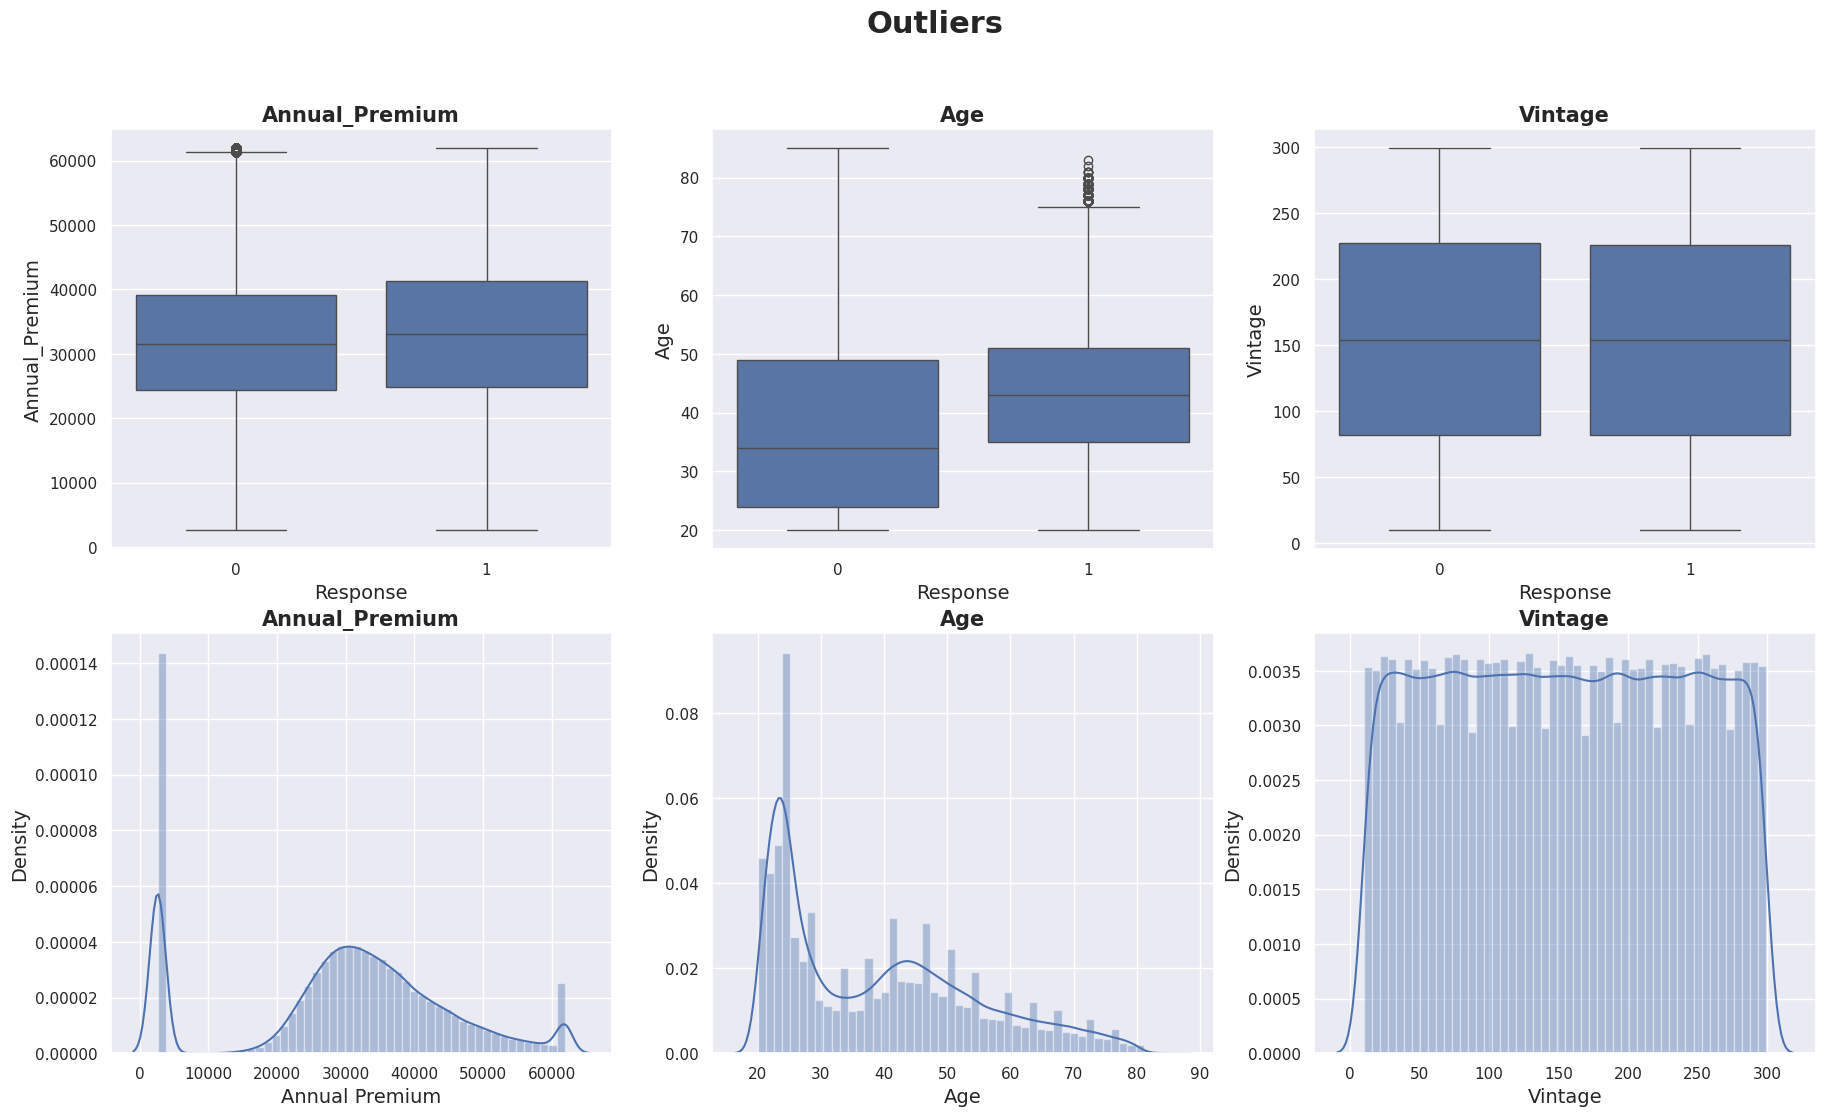

In [208]:
# Handling Outliers & Outlier treatments
show_outliers(df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we already treated outliers. So, there are no outliers to treat.

### 3. Categorical Encoding

In [209]:
# Encode your categorical columns
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [210]:
# Cheching data types
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Annual_Premium          float64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***